In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

path = '../data/petscore/'

# Any results you write to the current directory are saved as output.

In [2]:
!ls ../data/petscore

breed_labels.csv  test_images.zip     test.zip		train_metadata.zip
color_labels.csv  test_metadata       train.csv		train_sentiment
state_labels.csv  test_metadata.zip   train_images	train_sentiment.zip
test		  test_sentiment      train_images.zip	train.zip
test_images	  test_sentiment.zip  train_metadata


In [3]:
!head ../data/petscore/train.csv

Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care.,86e1089a3,1.0,2
2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartment. It was shaking so I had to bring it home to provide temporary care.,6296e909a,2.0,0
1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,"Their pregnant mother was dumped by her

In [4]:
# !ls ../input/train_metadata

In [5]:
!cat ../data/petscore/train_metadata/86e1089a3-1.json

#Use the first labelAnnotation score, topicality

{
    "labelAnnotations": [
        {
            "mid": "/m/01yrx",
            "description": "cat",
            "score": 0.9907862,
            "topicality": 0.9907862
        },
        {
            "mid": "/m/03dj64",
            "description": "black cat",
            "score": 0.9565297,
            "topicality": 0.9565297
        },
        {
            "mid": "/m/07k6w8",
            "description": "small to medium sized cats",
            "score": 0.9195353,
            "topicality": 0.9195353
        },
        {
            "mid": "/m/0307l",
            "description": "cat like mammal",
            "score": 0.8949834,
            "topicality": 0.8949834
        },
        {
            "mid": "/m/02zfy2",
            "description": "bombay",
            "score": 0.85398906,
            "topicality": 0.85398906
        },
        {
            "mid": "/m/01rn4d",
            "description": "korat",
            "score": 0.7455854,
            "topicality": 0.7455854
       

In [6]:
!cat ../data/petscore/train_sentiment/0008c5398.json

# Use documentSentiment.magnitude/score


{
  "sentences": [
    {
      "text": {
        "content": "Ollie was rescued from the construction site behind my house.",
        "beginOffset": -1
      },
      "sentiment": {
        "magnitude": 0,
        "score": 0
      }
    },
    {
      "text": {
        "content": "He is quite the manja type and loves to play.",
        "beginOffset": -1
      },
      "sentiment": {
        "magnitude": 0.9,
        "score": 0.9
      }
    },
    {
      "text": {
        "content": "He makes a good companion and playmate for young children.",
        "beginOffset": -1
      },
      "sentiment": {
        "magnitude": 0.9,
        "score": 0.9
      }
    },
    {
      "text": {
        "content": "He is quite the handsome chap with a distinct mark on his face like a beauty mark.",
        "beginOffset": -1
      },
      "sentiment": {
        "magnitude": 0.8,
        "score": 0.8
      }
    }
  ],
  "tokens": [],
  "entities": [
    {
      "name": "Ollie",
      "type": "PERSON"

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

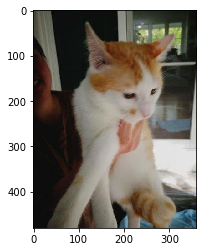

In [8]:
plt.imshow(mpimg.imread(path+'train_images/0008c5398-2.jpg'))

In [9]:
import pandas as pd

In [10]:
train_csv = pd.read_csv(path+'train.csv')

In [11]:
train_csv.head()


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [12]:
print(train_csv.shape)
print(train_csv.columns)

(14993, 24)
Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')


In [13]:
for col in train_csv.columns: print(col, len(train_csv[col].unique()))

Type 2
Name 9061
Age 106
Breed1 176
Breed2 135
Gender 3
Color1 7
Color2 7
Color3 6
MaturitySize 4
FurLength 3
Vaccinated 3
Dewormed 3
Sterilized 3
Health 3
Quantity 19
Fee 74
State 14
RescuerID 5595
VideoAmt 9
Description 14033
PetID 14993
PhotoAmt 31
AdoptionSpeed 5


In [14]:
#drop name, Description -> replace with documentSentiment.magnitude/score

#Lets not use images for time being

train_csv.Description.fillna("none")
train_csv['DescMagnitude'] = ""
train_csv['DescScore'] = ""

In [15]:
print(train_csv.columns)

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'DescMagnitude', 'DescScore'],
      dtype='object')


In [16]:
import os.path
import json

In [ ]:
for index, row in train_csv.iterrows():
    if(fs.path.exists(file_name))